In [1]:
from matplotlib import pyplot as plt
import tdc_daq as td
import numpy as np
measure_board_list = ["0906"]
name = "0906"
measure_time=11
trend_scan_Nsteps = 6
average_scaler_list        =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
average_scaler_list_err    =  [[ []  for i in range(trend_scan_Nsteps) ] for i in range(len(measure_board_list)) ]
for p in range(0,trend_scan_Nsteps):
    board_index = measure_board_list.index(name)
    scaler_rates = td.scaler_rate_of_board(name,measure_time) 
    average_scaler_list[measure_board_list.index(name)][p] =  scaler_rates    # average over 10 s   
    average_scaler_list_err[measure_board_list.index(name)][p] =  np.sqrt(scaler_rates*measure_time)/measure_time   



Welcome to JupyROOT 6.14/04


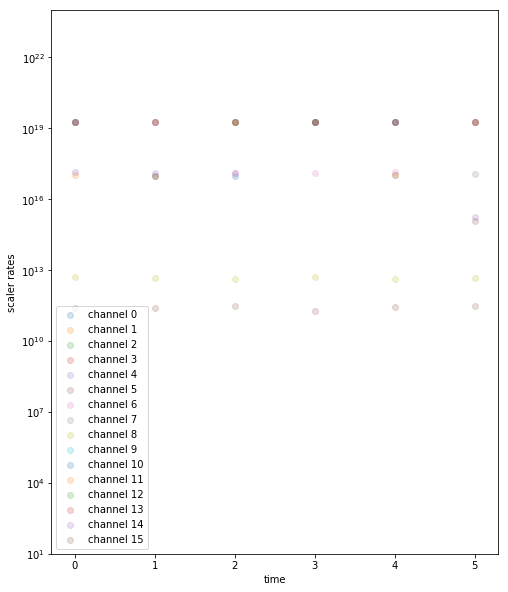

In [2]:

  
plt.rcParams["figure.figsize"] = (8,10)
for ch in range(0,16): 
         scaler_list = [0]*len(average_scaler_list[board_index])
         for i in range(0,len(average_scaler_list[board_index])):
                 scaler_list[i] = average_scaler_list[board_index][i][ch]
         nums = np.array(scaler_list)*10**(16-i)
         plt.scatter(range(0,len(scaler_list)), nums,alpha=0.2,label = "channel {:d}".format(ch))
            
# plt.show()
plt.legend()
plt.xlabel("time")
plt.ylabel("scaler rates") 
plt.yscale('log') 
plt.ylim(ymax = 1E24, ymin = 1E1)
plt.show()

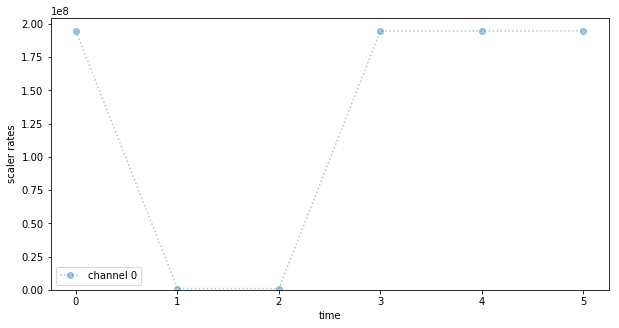

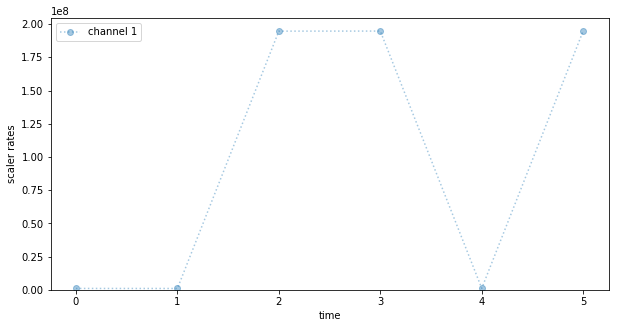

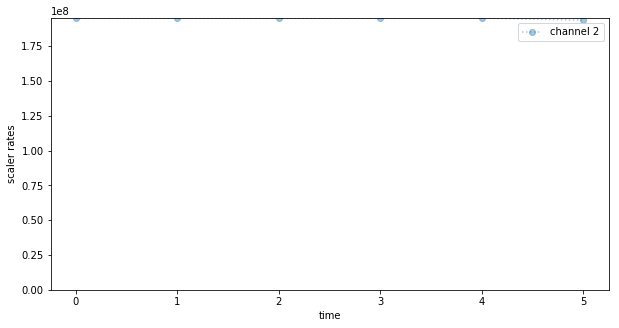

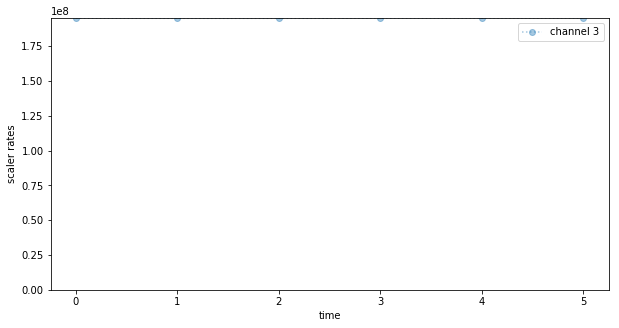

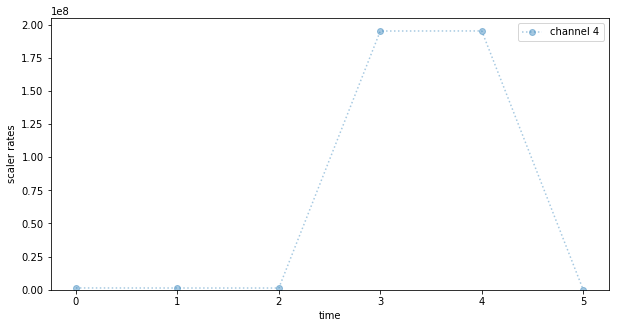

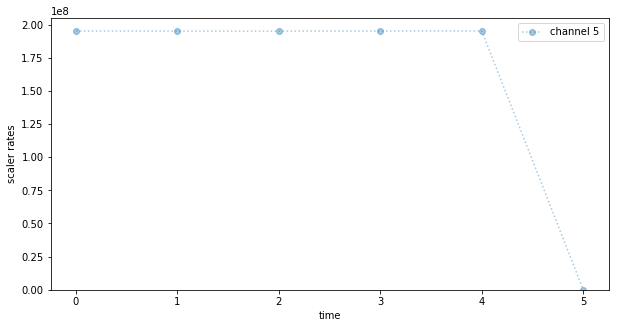

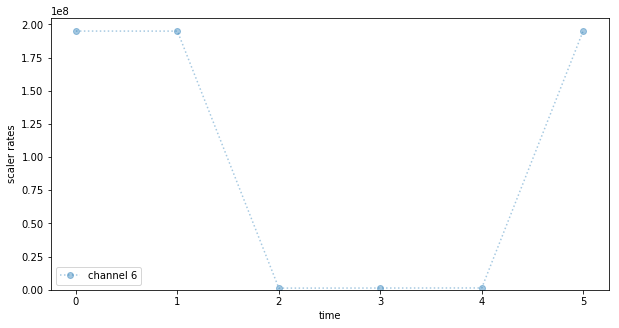

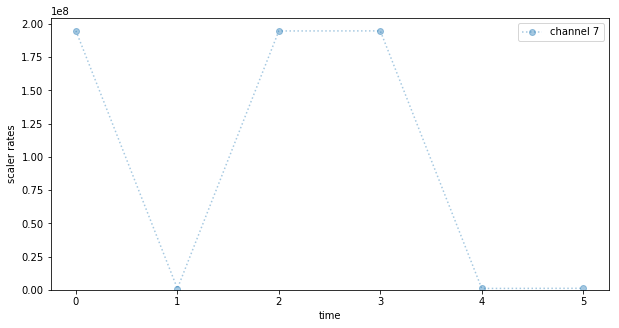

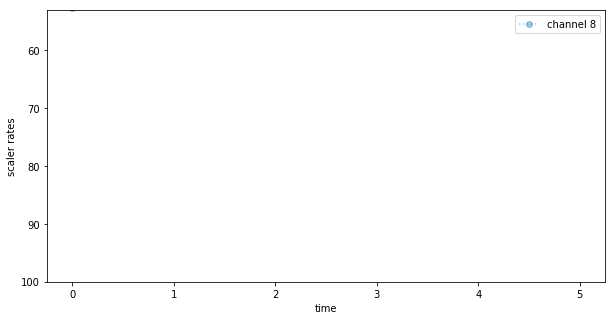

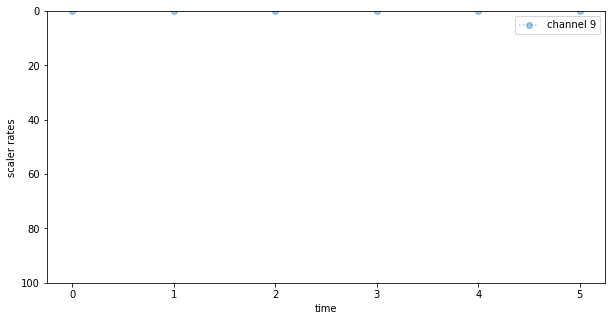

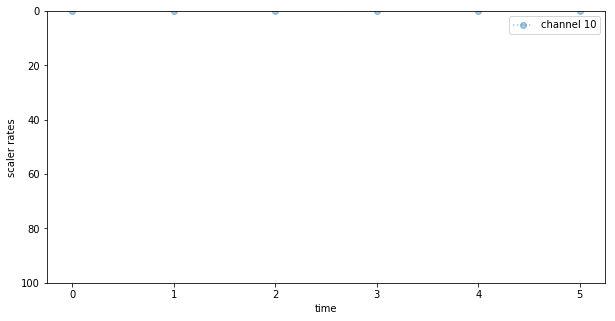

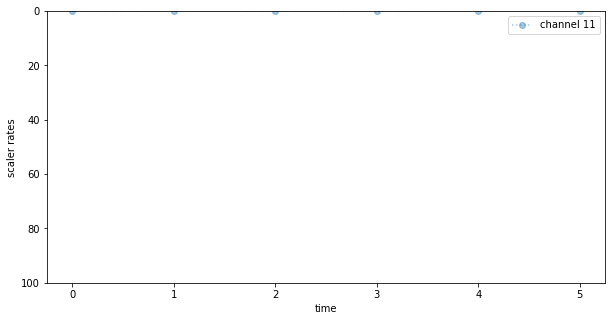

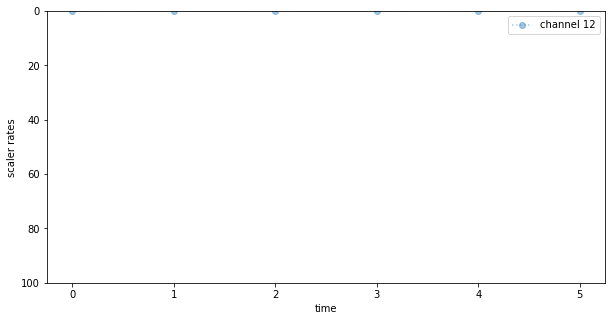

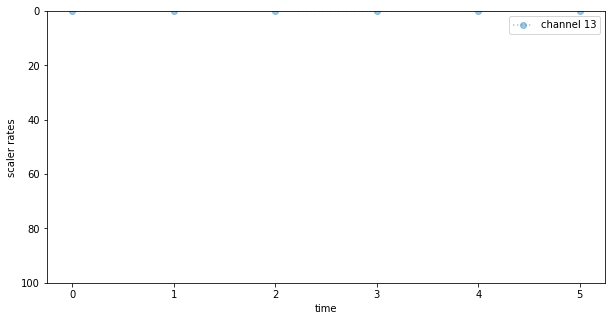

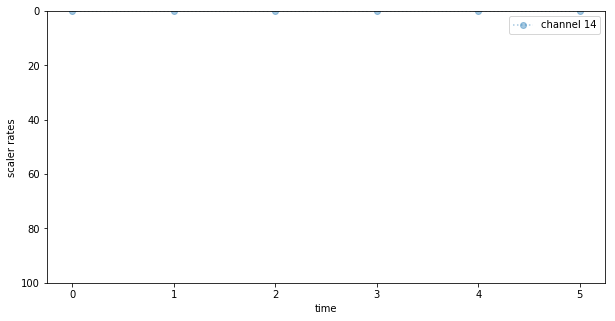

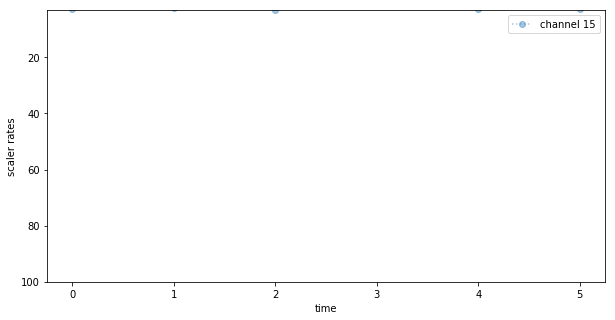

In [3]:
plt.rcParams["figure.figsize"] = (10,5)
for ch in range(0,16): 
        scaler_list = [0]*len(average_scaler_list[board_index])
        for i in range(0,len(average_scaler_list[board_index])):
            scaler_list[i] = average_scaler_list[board_index][i][ch]
        plt.errorbar(range(0,len(scaler_list)),scaler_list, yerr=None, xerr=None, fmt='o:', alpha=0.4,label = "channel {:d}".format(ch))
        plt.xlabel("time")
        plt.ylabel("scaler rates")             
        plt.legend()
        plt.ylim( ymin = 1E2)
        plt.show()

In [6]:
for i in range(0,20):
    print(td.scaler_rate_of_board(name,) )
    
    

[760824.9090909091, 194504197.0, 194918832.0909091, 1059792.2727272727, 194877392.9090909, 194881908.63636363, 194811358.45454547, 713460.1818181818, 42.81818181818182, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8181818181818183]
[194573822.36363637, 916655.2727272727, 195033667.8181818, 194874005.0, 194990791.27272728, 194996825.9090909, 194924778.0909091, 194516751.54545453, 41.90909090909091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5454545454545454]
[194563620.72727272, 194606206.45454547, 195021790.9090909, 194862444.72727272, 1279479.0909090908, 1284909.6363636365, 1212863.9090909092, 194504941.72727272, 44.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1818181818181817]
[794754.0, 194538948.63636363, 194953767.72727272, 194795213.9090909, 1211771.0, 1216551.0909090908, 1146023.2727272727, 741292.6363636364, 45.27272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.909090909090909]
[194434014.72727272, 775542.5454545454, 194889783.1818182, 1031350.3636363636, 1146970.8181818181, 194851809.1818182, 194782022.72727272, 